# Numerical integration

"area under a curve"

In [1]:
%matplotlib inline
import numpy as np
import scipy
import matplotlib.pyplot as plt

In [2]:
x = np.array([0, 1.25, 2, 2.75, 4.2, 5], dtype=np.float64)
y = np.array([0.5, 0.65, 0.8, 0.75, 0.4, 0.35], dtype=np.float64)

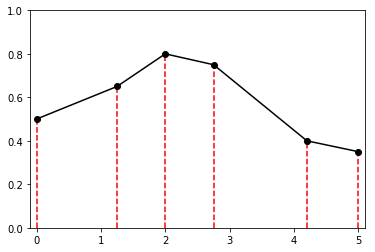

In [3]:
plt.ylim((0, 1))
plt.xlim((-0.1, 5.1))

# plot vertical lines
for xp,yp in zip(x,y):
    x1 = [xp, xp]
    y1 = [0,yp]
    plt.plot(x1,y1,'r--')

# plot the data
plt.plot(x,y, 'k-o')

In [4]:
# area under the curve

area = 0.
for i in range(x.shape[0]-1):
    dx = x[i+1] - x[i]
    a = 0.5 * dx * (y[i] + y[i+1])
    print('area in x=[{},{}] is {:.4f}'.format(x[i],x[i+1],a))
    area += a
print('total area = {}'.format(area))

area in x=[0.0,1.25] is 0.7188
area in x=[1.25,2.0] is 0.5438
area in x=[2.0,2.75] is 0.5813
area in x=[2.75,4.2] is 0.8337
area in x=[4.2,5.0] is 0.3000
total area = 2.9775


In [5]:
# vectorized version

dx = x[1:] - x[0:-1]
ym = (y[1:] + y[0:-1])*0.5
area = np.sum(dx * ym)
print('total area = {}'.format(area))

total area = 2.9775


In [6]:
# using scipy's trapezoidal rule

from scipy import integrate

integrate.trapz(y, x)

2.9775

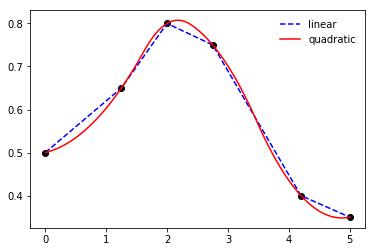

In [7]:
# integrate the interpolation function

from scipy import interpolate
f1 = interpolate.interp1d(x, y, kind='linear')
f2 = interpolate.interp1d(x, y, kind='quadratic')
plt.plot(x, y, 'ko')
xp = np.linspace(x[0], x[-1], 100)
plt.plot(xp, f1(xp), 'b--', label='linear')
plt.plot(xp, f2(xp), 'r-', label='quadratic')
plt.legend(frameon=False)

In [8]:
a1 = integrate.quad(f1,x[0],x[-1])[0]
a2 = integrate.quad(f2,x[0],x[-1])[0]
print('total area of f1 = {:.4f}'.format(a1))
print('total area of f2 = {:.4f}'.format(a2))

total area of f1 = 2.9775
total area of f2 = 2.9605
